### Assignment 3
Exploring DBSCAN Clustering method and comapring it to K-means and Hierarchical clustering 

**Important Note**: the following code cell was copied from a previously designed code that was used in class for Lab 5.

In [17]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

def plot_clustering_results(X, labels, centers, silhouette_avg, n_clusters=4):
    """
    Plots the clustering results and the silhouette scores for each sample.

    Parameters:
    X : array-like, shape (n_samples, n_features)
        The input data points.
    labels : array-like, shape (n_samples,)
        The cluster labels for each data point.
    centers : array-like, shape (n_clusters, n_features), optional
        The coordinates of the cluster centers. If None, no centers are plotted.
    silhouette_avg : float
        The average silhouette score for all the samples.
    n_clusters : int, optional, default=4
        The number of clusters.

    Returns:
    None
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

    # Plot the clustering result
    ax1.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    if centers is not None:
        ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_title('Clustering Result')

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax2.set_title("The silhouette plot for the various clusters.")
    ax2.set_xlabel("The silhouette coefficient values")
    ax2.set_ylabel("Cluster label")

    ax2.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax2.set_yticks([])
    ax2.set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.show()

### Step #1: Generating the datasets

In [18]:
# Importing necessary modules: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Generating two sets of data: 
# Moons dataset
a, b = make_moons(n_samples=300, noise=0.05, random_state=40)
# Blobs dataset
x, y = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=40)

### Step #2: Exploring Clustering Methods
#### 2.1 K-Means Clustering

In [ ]:
# 1. Training a k-means clustering model:
kmeans = KMeans(n_clusters=6, max_iter=5, random_state=42)
# Moons dataset
kmeans.fit(a)
b_kmeans = kmeans.predict(a)
# Blobs dataset
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

# 2. Evaluating the model - how well the clustering works (-1 to 1 range)
silhouette_avg1 = silhouette_score(a, b_kmeans)
print(f"Moons Silhouette Score: {silhouette_avg1}")
silhouette_avg2 = silhouette_score(x, y_kmeans)
print(f"Blobs Silhouette Score: {silhouette_avg2}")

# 3. Ploting the clustering results using the custom function
centers = kmeans.cluster_centers_
# Moons dataset
plot_clustering_results(a, b_kmeans, centers, silhouette_avg1, n_clusters=5)
# Blobs dataset
plot_clustering_results(x, y_kmeans, centers, silhouette_avg2, n_clusters=5)

#### 2.2 Hierarchical Clustering

In [ ]:
# Performing agglomerative clustering
# Forming linkage matrices
M = linkage(a, 'single') #Moons
B = linkage(x, 'ward') #Blobs

# Ploting the dendrogram for Moons
plt.figure(figsize=(10, 7))
dendrogram(M)
plt.title('Moons | Hierarchical Clustering Dendrogram (Agglomerative)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Ploting the dendrogram for Blobs
plt.figure(figsize=(10, 7))
dendrogram(B)
plt.title('Blobs | Hierarchical Clustering Dendrogram (Agglomerative)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Training an agglomerative clustering model
agg_clustering = AgglomerativeClustering(n_clusters=3)
b_agg = agg_clustering.fit_predict(a) # Moons
y_agg = agg_clustering.fit_predict(x) # Blobs


# Evaluating the model
silhouette_avg3 = silhouette_score(a, b_agg)
print(f"Moons Silhouette Score: {silhouette_avg3}")
silhouette_avg4 = silhouette_score(x, y_agg)
print(f"Blobs Silhouette Score: {silhouette_avg4}")

# Ploting the clustering results using the custom function
plot_clustering_results(a, b_agg, None, silhouette_avg3, n_clusters=3) #Moons
plot_clustering_results(x, y_agg, None, silhouette_avg4, n_clusters=4) #Blobs


#### 2.3 DBSCAN Clustering 

Number of clusters is: 2, and number of noise points is: 0
Number of clusters is: 5, and number of noise points is: 171
Moons Silhouette Score: 0.328321681334939
Blobs Silhouette Score: 0.1547826572203473


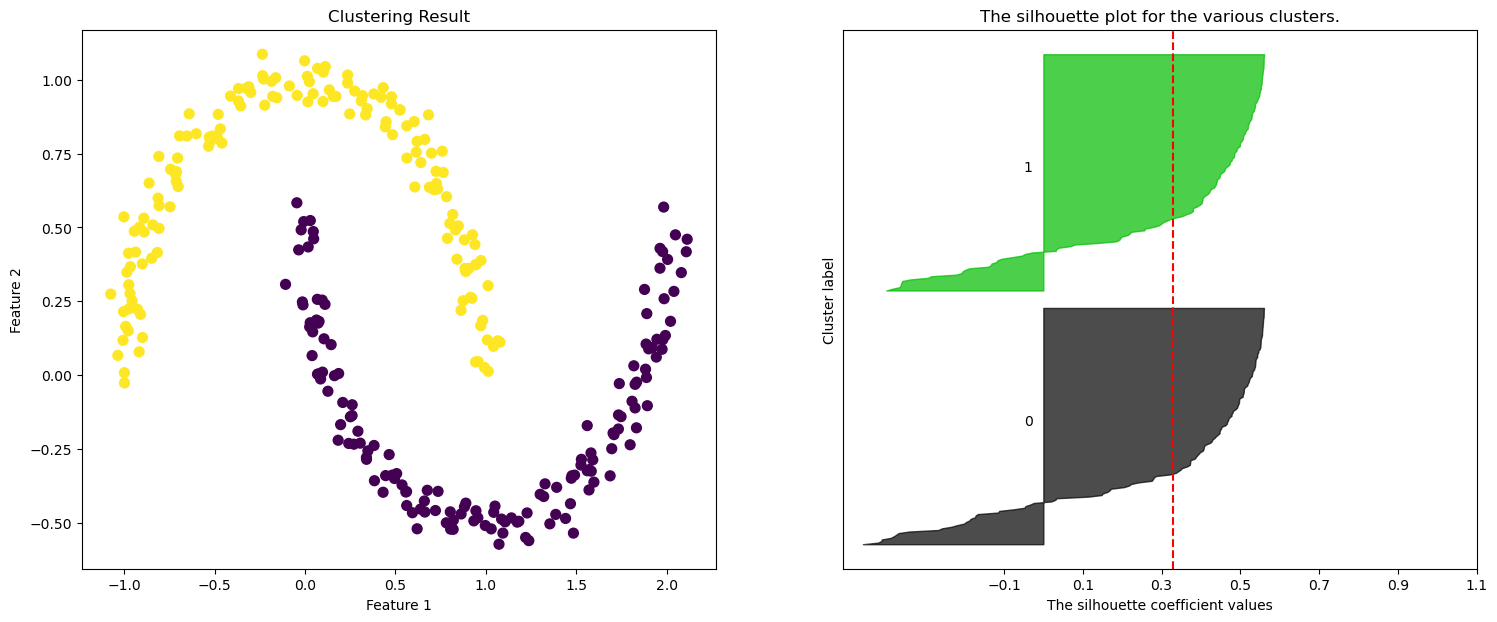

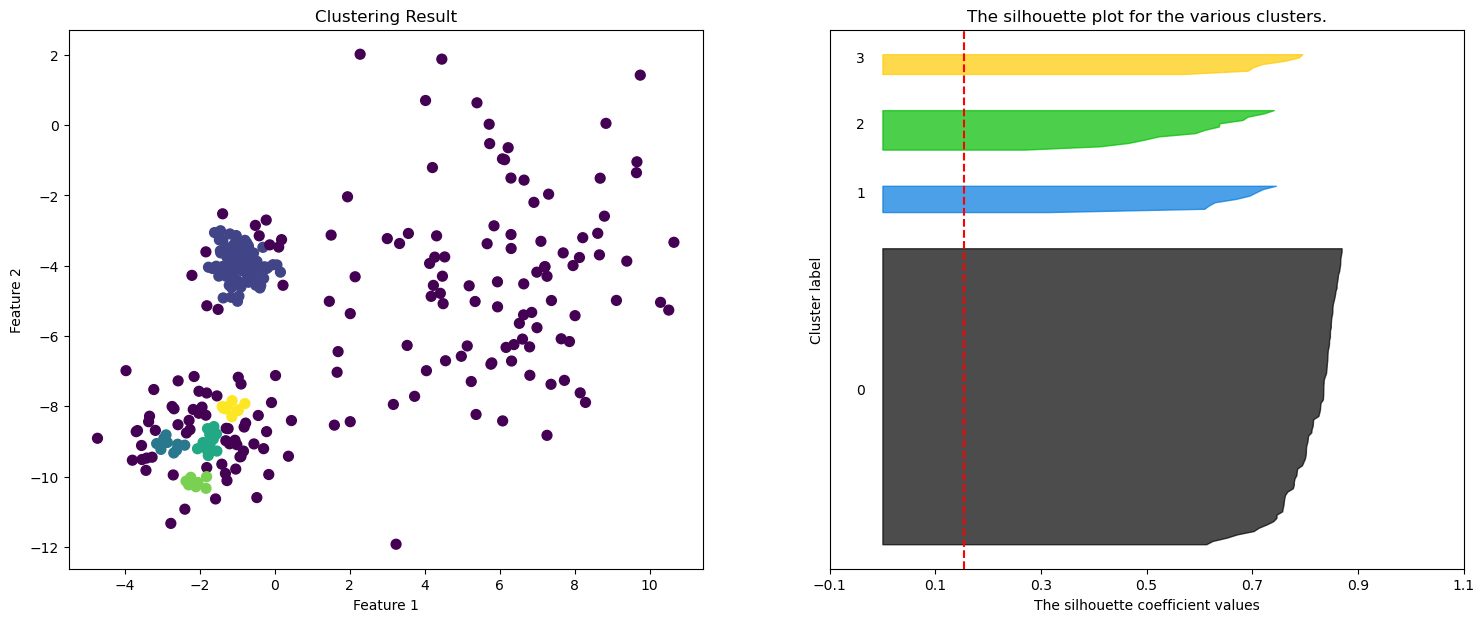

In [ ]:
# Generating the clustering models (might require tuning)
dbscan_moons = DBSCAN(eps=0.3, min_samples=5)
dbscan_blobs = DBSCAN(eps=0.3, min_samples=5)

# Fitting and predicting clusters:
b_moons_dbscan = dbscan_moons.fit_predict(a)
y_blobs_dbscan = dbscan_blobs.fit_predict(x)

# Accessing labels of points in data set
moons_labels = dbscan_moons.labels_
blobs_labels = dbscan_blobs.labels_
# Numbers of clusters & noise points
def clusters_and_noise(labels):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print (f"Number of clusters is: {n_clusters}, and number of noise points is: {n_noise}")

clusters_and_noise(moons_labels) #should generate perfect clusters
clusters_and_noise(blobs_labels) 

# Calculating silhuoette scores:
silhouette_avg5 = silhouette_score(a, b_moons_dbscan)
print(f"Moons Silhouette Score: {silhouette_avg5}")
silhouette_avg6 = silhouette_score(x, y_blobs_dbscan)
print(f"Blobs Silhouette Score: {silhouette_avg6}")

# Ploting the clustering results using the custom function
plot_clustering_results(a, b_moons_dbscan, None, silhouette_avg5, n_clusters=2) #Moons
plot_clustering_results(x, y_blobs_dbscan, None, silhouette_avg6, n_clusters=4) #Blobs
